In [58]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import joblib
import matplotlib.pyplot as plt


In [59]:
X_test = pd.read_csv('data/processed/X_test.csv')
y_test = pd.read_csv('data/processed/y_test.csv').squeeze()  # convert to Series

print("Test dataset loaded.")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Test dataset loaded.
X_test shape: (426, 21), y_test shape: (426,)


In [60]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Custom function used in stacking ensemble
def clip_probs(X):
    return np.clip(X, 1e-6, 1 - 1e-6)

# Optional: create the transformer (not required just for loading)
clip_transformer = FunctionTransformer(clip_probs)


In [61]:
os.makedirs("models", exist_ok=True)

model_files = {
    "Decision Tree": "models/decision_tree.joblib",
    "kNN": "models/knn.joblib",
    "Logistic Regression": "models/logistic_regression.joblib",
    "SVM": "models/svm_best.joblib",
    "Neural Network": "models/neural_network.joblib",
    # "XGBoost": "models/xgboost.joblib",
    "Random Forest": "models/random_forest.joblib",
    "Stacking Ensemble": "models/best_stacking_ensemble.joblib",
    "Voting Ensemble": "models/best_voting_ensemble.joblib"
}

loaded_models = {}
for name, path in model_files.items():
    if os.path.exists(path):
        loaded_models[name] = joblib.load(path)
        print(f"{name} model loaded from {path}")
    else:
        print(f"{name} model not found at {path}")


Decision Tree model loaded from models/decision_tree.joblib
kNN model loaded from models/knn.joblib
Logistic Regression model loaded from models/logistic_regression.joblib
SVM model loaded from models/svm_best.joblib
Neural Network model loaded from models/neural_network.joblib
Random Forest model loaded from models/random_forest.joblib
Stacking Ensemble model loaded from models/best_stacking_ensemble.joblib
Voting Ensemble model loaded from models/best_voting_ensemble.joblib


In [62]:
scaler_path = r"data\processed\scaler_ctg.pkl"
scaler = joblib.load(scaler_path)
X_test_scaled = scaler.transform(X_test)
print("Scaler loaded and test data scaled.")


Scaler loaded and test data scaled.


In [63]:
def evaluate_multiclass_models(models, X_test, y_test):
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    n_classes = len(lb.classes_)

    for name, model in models.items():
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)
        else:
            # For models without predict_proba
            y_proba = np.zeros((len(y_test), n_classes))

        print(f"\n{name} Performance Metrics:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
        if y_proba.any():
            print(f"ROC AUC (weighted, OvR): {roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted'):.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'{name} - Confusion Matrix')
        plt.show()



Decision Tree Performance Metrics:
Accuracy: 0.7582
Precision (weighted): 0.6473
Recall (weighted): 0.7582
F1-score (weighted): 0.6962
ROC AUC (weighted, OvR): 0.5590

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.96      0.88       332
         2.0       0.13      0.07      0.09        59
         3.0       0.00      0.00      0.00        35

    accuracy                           0.76       426
   macro avg       0.31      0.34      0.32       426
weighted avg       0.65      0.76      0.70       426



D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

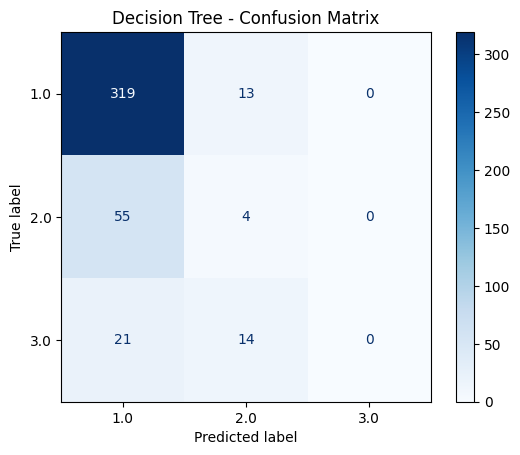

D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



kNN Performance Metrics:
Accuracy: 0.5775
Precision (weighted): 0.6447
Recall (weighted): 0.5775
F1-score (weighted): 0.5933
ROC AUC (weighted, OvR): 0.5614

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.67      0.73       332
         2.0       0.00      0.00      0.00        59
         3.0       0.16      0.66      0.25        35

    accuracy                           0.58       426
   macro avg       0.32      0.44      0.33       426
weighted avg       0.64      0.58      0.59       426



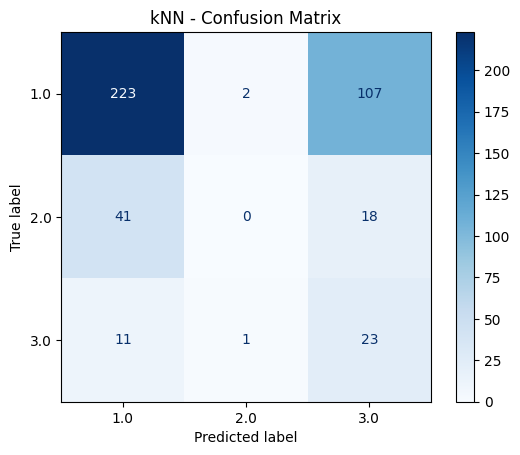


Logistic Regression Performance Metrics:
Accuracy: 0.5869
Precision (weighted): 0.8312
Recall (weighted): 0.5869
F1-score (weighted): 0.6386
ROC AUC (weighted, OvR): 0.8328

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.55      0.70       332
         2.0       0.26      0.90      0.40        59
         3.0       0.45      0.40      0.42        35

    accuracy                           0.59       426
   macro avg       0.56      0.62      0.51       426
weighted avg       0.83      0.59      0.64       426



D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


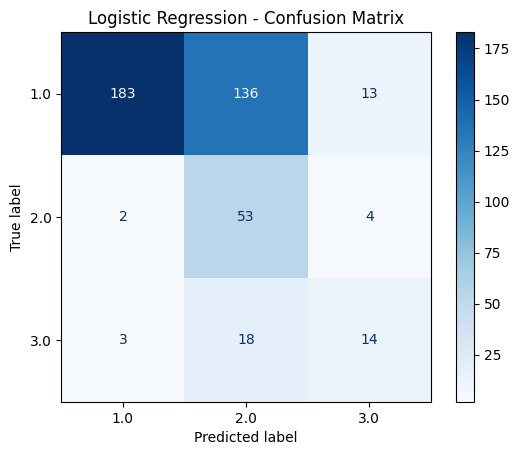


SVM Performance Metrics:
Accuracy: 0.6502
Precision (weighted): 0.8218
Recall (weighted): 0.6502
F1-score (weighted): 0.6925
ROC AUC (weighted, OvR): 0.7783

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.64      0.77       332
         2.0       0.31      0.83      0.46        59
         3.0       0.33      0.49      0.40        35

    accuracy                           0.65       426
   macro avg       0.54      0.65      0.54       426
weighted avg       0.82      0.65      0.69       426



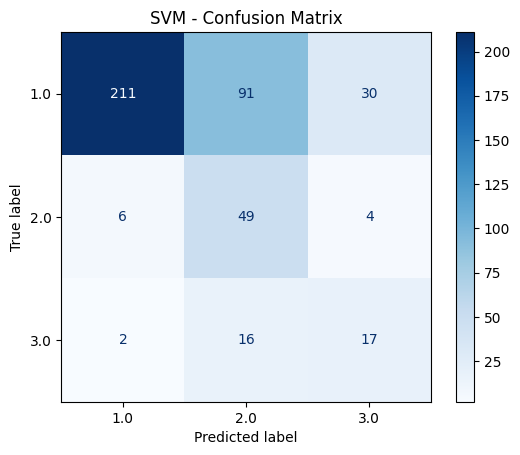


Neural Network Performance Metrics:
Accuracy: 0.6549
Precision (weighted): 0.8184
Recall (weighted): 0.6549
F1-score (weighted): 0.6980
ROC AUC (weighted, OvR): 0.7595

Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.67      0.78       332
         2.0       0.27      0.80      0.41        59
         3.0       0.50      0.31      0.39        35

    accuracy                           0.65       426
   macro avg       0.57      0.59      0.53       426
weighted avg       0.82      0.65      0.70       426



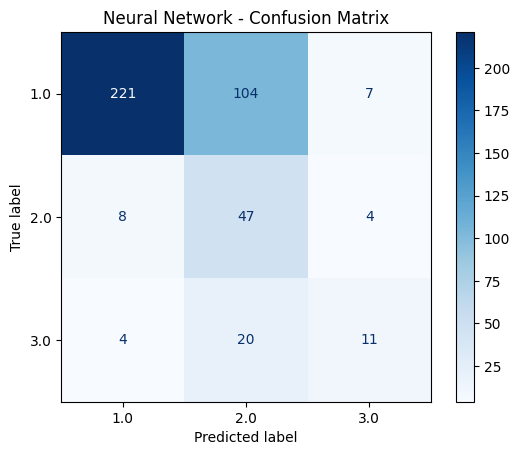


Random Forest Performance Metrics:
Accuracy: 0.7934
Precision (weighted): 0.6825
Recall (weighted): 0.7934
F1-score (weighted): 0.7150
ROC AUC (weighted, OvR): 0.7454

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88       332
         2.0       0.00      0.00      0.00        59
         3.0       0.78      0.20      0.32        35

    accuracy                           0.79       426
   macro avg       0.52      0.40      0.40       426
weighted avg       0.68      0.79      0.71       426



D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Fetal-Health-Classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

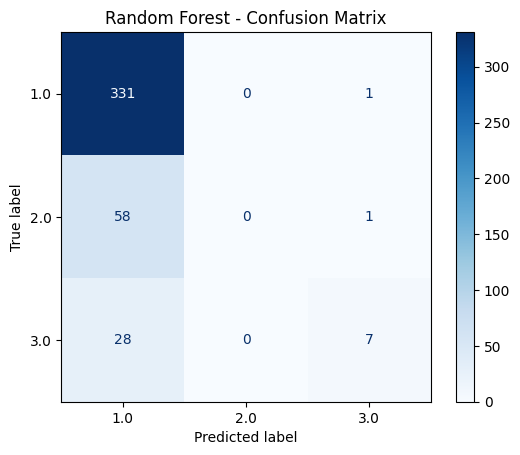

NotFittedError: This StackingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [64]:
evaluate_multiclass_models(loaded_models, X_test_scaled, y_test)
